#### Programming Exercise 4: Neural Networks Learning

advantage of matrix representation: can easily use them in vectorized algorithms.
advantage of vector representation: need vector representation to use the built in optimizers    

In [1]:
#same dataset as before
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io 
import scipy.misc 
import matplotlib.cm as cm 
import random 
from scipy.special import expit as sigmoid
#sigmoid will be vectorized

In [77]:
#how to work with .mat files in python.
#training set of handwritten digits
#Therefore, a “0” digit is labeled as “10”, while
#the digits “1” to “9” are labeled as “1” to “9” in their natural order.
data = 'ex4data1.mat'
mat = scipy.io.loadmat(data)

X, Y= mat['X'], mat['y']

#ideally i should import functions from previous exercises instead of copy pasting them in.

data = 'ex4weights.mat'
mat = scipy.io.loadmat(data)

Theta1, Theta2= mat['Theta1'], mat['Theta2']

#### 1.1 Visualizing the data

Since i've already done the dislplay_data file in a previous notebook, this became an excercise in trying to import code from notebooks. http://nbviewer.jupyter.org/github/ipython/ipython/blob/master/examples/IPython%20Kernel/Importing%20Notebooks.ipynb. was difficult to import from notebook. could easily import from a .py file though.

In [30]:
# %load -s display_data ../ex3_neural_networks/ex3_neural_networks
def display_data(X,Y,sample_rows=100):
    #sample rows has to be square

    width=20
    height=20

    row_dim=int(np.sqrt(sample_rows)*height)
    col_dim=row_dim

    matrix=np.zeros((row_dim,col_dim)).astype(float)

    random_index=random.sample(range(0,4000), sample_rows)

    row_i=0
    col_i=0
    for i in random_index:


        random_row=X[i][:]
        X_row_matrix=np.reshape(random_row,(20,20)).T

        matrix[ height*row_i : height*(row_i+1) , width*col_i : width*(col_i+1)]=X_row_matrix
        #the submatrix shape will be 20 by 20. and from a given row, it will go columnwise
        #(as opposed to the converse, namely that for a given column, go row-wise)
        #there probably exists a name for this but i dont know it. drawing pictures help.
        #for this submatrix (that is populated by zeros), assign it the X_row_matrix

        col_i+=1
        #for the given row_i, increment col_i

        if col_i==matrix.shape[1]/height:
            #i,e we have looped through col_i until the end of the col_dim

            row_i+=1
            col_i=0
            #then we want to reset the col index and start on a new row

            #we do not need the same kind of reset-mechanism on row_i since random_index, by construction, has just the correct length

    return matrix


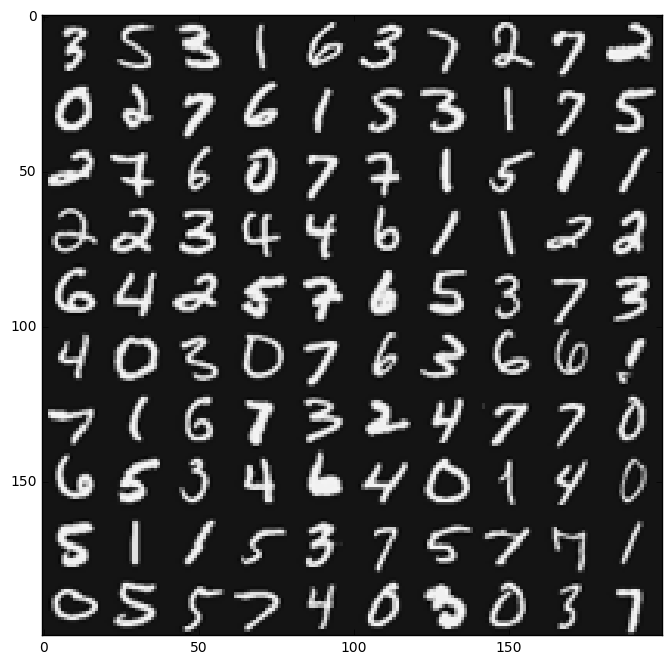

In [31]:
tst_matrix=display_data(X,Y)
fig = plt.figure(figsize=(8,8))
img_matrix=scipy.misc.toimage(tst_matrix)
plt.imshow(img_matrix,cmap=plt.cm.Greys_r, interpolation='none')
plt.show()

In [32]:
#create cost function
#in order to do it need to transform the y's
#start by putting 1's in X

In [85]:
#have to assign 1's column to X and make sure they are holding floats(to make the matrix operations work smoothly)
X=np.insert(X, 0, 1, axis=1)
X=X.astype(float)
Y=Y.astype(float)

In [34]:

def g(y_label):

    def f(y):

        if y==y_label:
            return 1
        else:
            return 0
        
    return f    

In [35]:
def label_generator(Y, K=10, tol=1):
    Y_len=len(Y)
    labels=list(range(1,K+1))
    #1-10 incl
    
    #in some other circumstance the labels should be retrived from  the Y array
    Y_matrix=np.zeros((10,Y_len))
    
    
    for label in labels:
        Y_labeled=np.array(list(map(g(label), Y)))
         
        Y_matrix[label-1]=Y_labeled
    
    return Y_matrix

In [36]:
Y_matrix=label_generator(Y)

In [37]:
#Y_matrix's rows are filled with the booleans. row0 is label 1....row9 is label10 (which is 0)

In [38]:
def h_theta(X,Theta1, Theta2, give_all_matrices=False):
    
    #biasterm has already been added in X.T
    a_1_matrix=X.T
    
    z_2_matrix=np.dot(Theta1,a_1_matrix)
    #should be a 25X5000 matrix
    a_2_matrix=sigmoid(z_2_matrix)
    
    #interp: the zeroth element in that row represent a scalar, z2 after the transformation of one vector.
    #it is a row, beause i will do it such that the input layer is the entire X, and not X[i]
    
    a_2_matrix=np.insert(a_2_matrix,0,1,axis=0)
    # need to add a bias term
    
    z_3_matrix=np.dot(Theta2,a_2_matrix)
    
    a_3_matrix=sigmoid(z_3_matrix)
    #shape of this thing will be 10x5000.
    
    h_theta_matrix=a_3_matrix
    
    if give_all_matrices==False:
        return h_theta_matrix
    else:
        return a_1_matrix,a_2_matrix,a_3_matrix, z_2_matrix, z_3_matrix

In [39]:
def cost_function_nn(Y_matrix,X,Theta1,Theta2, l=0):
    
    K=len(Y_matrix)
    M=len(X)
    
    h_theta_matrix=h_theta(X, Theta1, Theta2)
    #h_theta_matrix shape 10x5000
    
    total_cost=[]
    
    for k in range(K):
        h_theta_row=h_theta_matrix[k]
        #h theta row will be a vector with length M(i,e all observations), where i have computed h_theta by feed forward.
        Y_k=Y_matrix[k]
        #Y_k will be a  vector with length M (5000)   filled with 1's instead of k and filled with 0 otherwise
            
         
        term1=-np.dot(Y_k.T,np.log(h_theta_row))
        term2=np.dot((1-Y_k).T,np.log(1-h_theta_row))
            
        class_cost=(term1-term2)/M
        total_cost.append(class_cost)
     
    #Note that you should not be regularizing the terms that correspond to the bias.
    
        #Theta1[:,1:]
        #Theta2[:,1:]
        reg_term=(sum(sum(Theta1[:,1:]**2))+sum(sum(Theta2[:,1:]**2)))*l/(2*M)
    
    return sum(total_cost) +reg_term

In [40]:
cost_function_nn(Y_matrix,X,Theta1,Theta2, l=0)
    
    

0.28762916516131892

"You should see that the cost is about 0.287629."-pdf. Satisfaction. Was a challenging abstraction to make. I like matrix notation way more than sums everywhere, I think it gives a better overview.

In [41]:
cost_function_nn(Y_matrix,X,Theta1,Theta2, l=1)

0.38376985909092365

"You should see that the cost is about 0.383770."-pdf

### 2 Backpropagation

In [15]:


def sigmoid_gradient(x):
    
    return sigmoid(x)*(1-sigmoid(x))

In [16]:
sigmoid_gradient(Y_matrix).shape==Y_matrix.shape

True

#### 2.2 Random initialization

In [42]:
def nn_random_theta_init(shape, interval=0.12):
    #enter shape as tuple
    dim=shape[0]*shape[1]
    
    
    interval=np.linspace(-interval,interval,dim)
    #generate all neccessary elements
    
    random_interval=np.random.shuffle(interval)
    #shuffle them
    
    #import pdb; pdb.set_trace()

    
    matrix=np.reshape(interval, shape)
    
    #is this unstable?!?!? probem whith gradient checking
    
    return matrix    
        
    

In [43]:
Theta1_random=nn_random_theta_init(Theta1.shape)

In [44]:
Theta2_random=nn_random_theta_init(Theta2.shape)

In [45]:
Theta1_random.shape==Theta1.shape

True

#### 2.3 Backpropagation

In [121]:
#idea: compute the 'deltas'. by a result, we can easily get the partial derivatives from this.


def back_propagation(X,Theta1_random, Theta2_random, Y_matrix,l=0):
    
    
    a_1_matrix,a_2_matrix,a_3_matrix, z_2_matrix, z_3_matrix=h_theta(X,Theta1_random, Theta2_random, give_all_matrices=True)

    
    d_3_matrix=a_3_matrix-Y_matrix #10x5000
    
    
    #need to remove delta_0
    term=np.dot(Theta2_random.T,d_3_matrix)
    ##26*5000
    term=term[1:]
    #25x5000
    
    d_2_matrix=term*sigmoid_gradient(z_2_matrix)
    
    
    return d_2_matrix,d_3_matrix,a_1_matrix,a_2_matrix
    



In [193]:
#with some random thetas,give me some small d vectors

In [194]:
#d_2_matrix,d_3_matrix,a_2_matrix, a_3_matrix=back_propagation(X,Theta1_random,Theta2_random,Y_matrix)   

In [119]:
def gradient_collector(X,Theta1_random,Theta2_random,Y_matrix, D_1_matrix=None,D_2_matrix=None,l=0):
    
    d_2_matrix,d_3_matrix,a_1_matrix,a_2_matrix=back_propagation(X,Theta1_random,Theta2_random,Y_matrix,l=l) 
    #back_propagation function calls h_theta, which takes the entire X and front-propagates
    #from the information from fron propagates, it computes the d_2 and d_3 -matrices that are neccessary for collecting
    #the gradient
    
    #gradient_collector corresponds to step 4 in backprop from the pdf.
    
    D_1_term=np.dot(d_2_matrix,a_1_matrix.T)
    D_2_term=np.dot(d_3_matrix,a_2_matrix.T)
    
    if D_1_matrix==None and D_2_matrix==None:
        #if they are not initalized, initalize em'!
        
        D_1_matrix=np.zeros(D_1_term.shape)
        D_2_matrix=np.zeros(D_2_term.shape)
        #should be 25x401 and 10x26 respectivly
        
        #they correspond  to shapes of Theta1,Theta2, respectivly!
        
    #update
    
    #and regularization; still need to divide by M later!
    
    Theta1_reg=np.copy(Theta1_random)
    Theta2_reg=np.copy(Theta2_random)
    
    Theta1_reg[:, 0] =  1
    Theta2_reg[:, 0] =  1
    #so ive put a zero to each element in the zeroth column. 
    
    
    D_1_matrix=(D_1_matrix + D_1_term) + l*Theta1_reg
    D_2_matrix=(D_2_matrix + D_2_term) + 1*Theta2_reg
        

    #probably need to return them unrolled into one huge vector, and devide my 
    
    #To perform gradient checking on your parameters, you can imagine “unrolling” the parameters Θ(1), Θ(2) into a long vector θ
    #this will be the pattern
    
    #D_1_matrix_flatten=D_1_matrix.flatten('C')
    #'C' flattens row-wise, i,e preserves the rows, whereas 'F' flattens column-wise,
    
    return D_1_matrix,D_2_matrix
    
    

In [46]:
D_1_matrix,D_2_matrix=gradient_collector(X,Theta1_random,Theta2_random,Y_matrix, D_1_matrix=None,D_2_matrix=None)

#### 2.4 Gradient checking

"Suppose you have a function fi(θ) that purportedly computes ∂ J(θ);" -pdf. my gradient_nn corresposnds to this

In [49]:
def gradient_checker(X,Theta1_random,Theta2_random,Y_matrix, D_1_matrix=None,D_2_matrix=None,sample=10,reg=0):
    
    D_1_matrix,D_2_matrix=gradient_collector(X,Theta1_random,Theta2_random,Y_matrix, D_1_matrix=None,D_2_matrix=None,l=reg)
    
    D_list=[D_1_matrix,D_2_matrix]
    
    
    epsilon=0.0001
    for s in range(sample):
        
        
        k=random.sample(range(0,2), 1)[0]
        D=D_list[k]
        i_end=D.shape[0]
        j_end=D.shape[1]
        i=random.sample(range(0,i_end), 1)[0]
        j=random.sample(range(0,j_end), 1)[0]
        
        numerical_derivative=D[i][j]/5000
        
        if k ==0:
            #then it is theta1
            Theta1_random_epsilon=np.zeros(Theta1_random.shape)
            Theta1_random_epsilon[i][j]=epsilon

            Theta1_random_epsilon_minus=Theta1_random-Theta1_random_epsilon

            Theta1_random_epsilon_plus=Theta1_random+Theta1_random_epsilon


            J_minus=cost_function_nn(Y_matrix,X,Theta1_random_epsilon_minus,Theta2, l=reg)
            J_plus=cost_function_nn(Y_matrix,X,Theta1_random_epsilon_plus,Theta2, l=reg)

            approx_derivative=(J_plus-J_minus)/float((2*epsilon))
            
        if k==1:
            Theta2_random_epsilon=np.zeros(Theta2_random.shape)
            Theta2_random_epsilon[i][j]=epsilon

            Theta2_random_epsilon_minus=Theta2_random-Theta2_random_epsilon

            Theta2_random_epsilon_plus=Theta2_random+Theta2_random_epsilon


            J_minus=cost_function_nn(Y_matrix,X,Theta1,Theta2_random_epsilon_minus, l=0)
            J_plus=cost_function_nn(Y_matrix,X,Theta1,Theta2_random_epsilon_plus, l=0)

            approx_derivative=(J_plus-J_minus)/float((2*epsilon))
        
        print("layer:{layer}, i:{i}, j:{j} \n numerical_derivative:{num_der}, approx_derivative:{approx_der} \n".format(layer=k+1,i=i,j=j,num_der=numerical_derivative,approx_der=approx_derivative))
        

In [50]:
gradient_checker(X,Theta1,Theta2,Y_matrix, D_1_matrix=None,D_2_matrix=None,sample=10)

layer:1, i:22, j:43 
 numerical_derivative:9.587731917343894e-08, approx_derivative:9.587747262784774e-08 

layer:1, i:0, j:242 
 numerical_derivative:-3.635368621920096e-05, approx_derivative:-3.635368617249668e-05 

layer:1, i:8, j:126 
 numerical_derivative:-4.743832391846006e-05, approx_derivative:-4.743832326958852e-05 

layer:1, i:23, j:215 
 numerical_derivative:0.0002302300195245952, approx_derivative:0.00023023001921584907 

layer:2, i:6, j:15 
 numerical_derivative:-0.000821194134372597, approx_derivative:-0.0012430334403457088 

layer:2, i:4, j:13 
 numerical_derivative:5.812679082717592e-05, approx_derivative:0.0001290413503829413 

layer:1, i:4, j:228 
 numerical_derivative:0.0001667500239791332, approx_derivative:0.00016675002517674287 

layer:1, i:8, j:62 
 numerical_derivative:-1.3762496713446796e-08, approx_derivative:-1.376232461325344e-08 

layer:1, i:5, j:37 
 numerical_derivative:3.152468515945395e-07, approx_derivative:3.152467176192886e-07 

layer:1, i:8, j:161 


In [51]:
gradient_checker(X,Theta1_random,Theta2_random,Y_matrix, D_1_matrix=None,D_2_matrix=None,sample=10)

layer:2, i:9, j:16 
 numerical_derivative:0.15348187454560283, approx_derivative:0.1658665552772831 

layer:1, i:0, j:125 
 numerical_derivative:-0.0013954041000140548, approx_derivative:0.004916941982457956 

layer:2, i:7, j:24 
 numerical_derivative:0.23034796266428015, approx_derivative:0.19958208715920023 

layer:1, i:19, j:6 
 numerical_derivative:-1.148236343340216e-06, approx_derivative:-3.3169555990753e-05 

layer:1, i:3, j:294 
 numerical_derivative:0.0029627809748255327, approx_derivative:0.0083527019256735 

layer:2, i:1, j:15 
 numerical_derivative:0.21656102832434754, approx_derivative:0.10901974636823297 

layer:2, i:5, j:4 
 numerical_derivative:0.19221564208439804, approx_derivative:0.21029269917427484 

layer:2, i:7, j:21 
 numerical_derivative:0.22118575246499309, approx_derivative:0.2230456830343286 

layer:1, i:18, j:345 
 numerical_derivative:-0.00038983390644895156, approx_derivative:-0.0035985876056798816 

layer:2, i:3, j:8 
 numerical_derivative:0.1729495350862

It works well for the given Thetas, but not so well for random Thetas....hmmm....

# gradientchecking with regularization

In [52]:
gradient_checker(X,Theta1,Theta2,Y_matrix, D_1_matrix=None,D_2_matrix=None,sample=10, reg=1)

layer:2, i:6, j:18 
 numerical_derivative:0.0005234775261822678, approx_derivative:0.0007795259851506309 

layer:1, i:21, j:378 
 numerical_derivative:4.739470804703022e-07, approx_derivative:4.739472703185754e-07 

layer:2, i:9, j:12 
 numerical_derivative:0.0010873832502818583, approx_derivative:0.001631305047988807 

layer:1, i:5, j:244 
 numerical_derivative:-0.00022513191175622312, approx_derivative:-0.00022513191172413016 

layer:1, i:19, j:236 
 numerical_derivative:2.7976503573713173e-05, approx_derivative:2.7976504723969953e-05 

layer:1, i:2, j:245 
 numerical_derivative:-0.00023654832986476801, approx_derivative:-0.00023654833009034704 

layer:1, i:21, j:55 
 numerical_derivative:-1.394137371137646e-06, approx_derivative:-1.39413730559923e-06 

layer:2, i:1, j:0 
 numerical_derivative:0.0005646293300115133, approx_derivative:0.0003646293392223221 

layer:1, i:20, j:325 
 numerical_derivative:-1.0023279059189741e-05, approx_derivative:-1.0023278873561026e-05 

layer:1, i:6, j

#### 2.6 Learning parameters using fmincg

recall fmin_cg (from ex3)

In [58]:
from scipy import optimize

In [ ]:
#have to do some unrolling versions is order for fmin_cg to work. there should exist a more general optimizer!


In [53]:
def cost_function_nn_unrolled(Thetas_unrolled,Y_matrix,X, l=0):
    
    Theta1=np.reshape(Thetas_unrolled[0:25*401],(25,401))   #will be c-like, will preserve the rows of the matrix and put them next to eachother
    Theta2=np.reshape(Thetas_unrolled[25*401:],(10,26))
    
    
    cost=cost_function_nn(Y_matrix,X,Theta1,Theta2, l=l)
    
    return cost

In [55]:
#d_1 needs an input when in the optimizer?!
def gradient_function_nn_unrolled(Thetas_unrolled,Y_matrix,X, D_1_matrix=None,D_2_matrix=None,l=0):
    
    Theta1=np.reshape(Thetas_unrolled[0:25*401],(25,401))   #will be c-like, will preserve the rows of the matrix and put them next to eachother
    Theta2=np.reshape(Thetas_unrolled[25*401:],(10,26))
    
    D_1_matrix,D_2_matrix=gradient_collector(X,Theta1,Theta2,Y_matrix, D_1_matrix=None,D_2_matrix=None,l=l)
    
    
    D_1_matrix_flatten=D_1_matrix.flatten('C') 
    D_2_matrix_flatten=D_2_matrix.flatten('C')
    #layer l, and then the indexing goes from left through right, for every row
    
    D_unrolled=np.concatenate((D_1_matrix_flatten,D_2_matrix_flatten))/float(len(X))
    
    return D_unrolled

In [59]:
def optimal_thetas_cg(Theta1,Theta2,X,Y_matrix,l=0, iterations=2000):
    
    
    Thetas_unrolled=np.concatenate((Theta1.flatten('C'),Theta2.flatten('C')))
    
    result = optimize.fmin_cg(cost_function_nn_unrolled, fprime=gradient_function_nn_unrolled, x0=Thetas_unrolled, args=(Y_matrix, X, l), maxiter=iterations,
                              full_output=True)
    return result[0], result[1]

In [60]:
Thetas_unrolled,cost=optimal_thetas_cg(Theta1,Theta2,X,Y_matrix,l=0, iterations=2000)

         Current function value: 0.069743
         Iterations: 52
         Function evaluations: 292
         Gradient evaluations: 281


In [61]:
Thetas_random_unrolled,cost=optimal_thetas_cg(Theta1_random,Theta2_random,X,Y_matrix,l=0, iterations=2000)

         Current function value: 0.085004
         Iterations: 119
         Function evaluations: 461
         Gradient evaluations: 449


low value of the cost! in both cases. given thetas and random thetas

In [68]:
Theta1=np.reshape(Thetas_unrolled[0:25*401],(25,401))   #will be c-like, will preserve the rows of the matrix and put them next to eachother
Theta2=np.reshape(Thetas_unrolled[25*401:],(10,26))

Theta1_random=np.reshape(Thetas_random_unrolled[0:25*401],(25,401))   #will be c-like, will preserve the rows of the matrix and put them next to eachother
Theta2_random=np.reshape(Thetas_random_unrolled[25*401:],(10,26))

recall neural_network from ex3. am now using it with "my" trained thetas(2 cases: random thetas, and the ones i was given).

In [62]:
def neural_network(Theta1,Theta2,x):
    #need to stick in a one (i assume that it has not already been done)
    a1=np.insert(x,0,1,axis=0)
    
    a2=sigmoid(np.dot(Theta1,a1))
    a2=np.insert(a2, 0, 1, axis=0)
    
    a3=sigmoid(np.dot(Theta2,a2))
    
    prediction_array=a3
    
    
    ###img
    x_matrix=np.reshape(x,(20,20)).T
    
    fig = plt.figure(figsize=(2,2))
    img_matrix=scipy.misc.toimage(x_matrix)
    plt.imshow(img_matrix,cmap=plt.cm.Greys_r, interpolation='none')
    plt.show()
    print('above is the image-representation of the input and below the prediction')
    ####
    
    
    
    max_value=max(prediction_array)
    
    for i in range(len(prediction_array)):
        if prediction_array[i]==max_value:
            max_value_index=i
            
    print(('the algorithm (neural network) assigns max value: {max_value} to class: {max_value_index} ').format(max_value=max_value, max_value_index=max_value_index+1))        
    

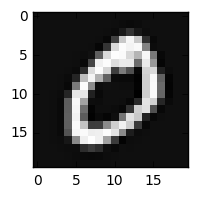

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.9957340119861678 to class: 10 


In [90]:
neural_network(Theta1,Theta2,X[0][1:])

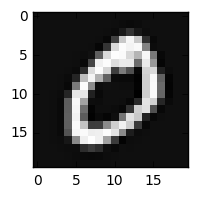

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.9990781080546361 to class: 10 


In [69]:
neural_network(Theta1_random,Theta2_random,X[0][1:])

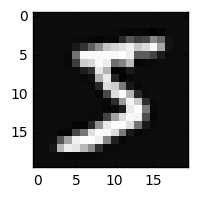

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.998254158532237 to class: 5 


In [65]:
neural_network(Theta1,Theta2,X[2500][1:])

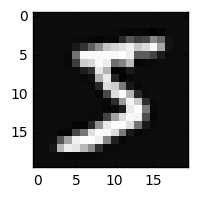

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.9578285559224076 to class: 5 


In [71]:
neural_network(Theta1_random,Theta2_random,X[2500][1:])

Looks good! time to get some sort of accuracy measure

In [113]:
def training_set_accuracy(Theta1,Theta2,X,Y_matrix):
    
    #Y_matrix's rows are filled with the booleans. row0 is label 1....row9 is label10 (which is 0)
    
    h_theta_matrix=h_theta(X,Theta1, Theta2, give_all_matrices=False)
    
    #h_theta_matrix.shape is (10,5000) #row0 is label_1, and contains the probabilities that the 50000 observations are in class 1 (that the picture is a 1).
    #so column0 corresponds to the different probabilitie's picture_0 has been assigned by the trained hypothesis function.
    
    #plan of attack: for every column i(this will be for all pictures) in  h_theta_matrix, find: 1) the max element in that column AND 2) the row, j that it is located on.
    #this row location, j corresponds to the class the algorithm has assigned.
    #compare 1 to the element located in Y_matrix's row j,column i,... lets go!
    m=len(X)
    counter=0
    
    for i in range(m):
        h_theta_column=h_theta_matrix[:,i]
        Y_column=Y_matrix[:,i]
        
        max_value=max(h_theta_column)
        max_value_index=None
        
        for j in range(len(h_theta_column)):
            if h_theta_column[j]==max_value:
                max_value_index=j
        
        if Y_column[max_value_index]==1:
            counter=counter+1
        else:
            print("missclassifications")
            neural_network(Theta1,Theta2,X[i][1:])
                       
    return counter/m
    
    
    

* ***drum roll*** *

missclassifications


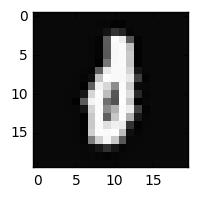

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.23870885177263595 to class: 8 
missclassifications


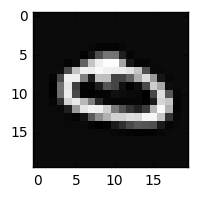

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.46132795541432864 to class: 9 
missclassifications


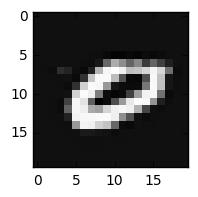

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.36358958875771547 to class: 4 
missclassifications


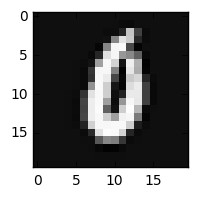

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4532530280817804 to class: 6 
missclassifications


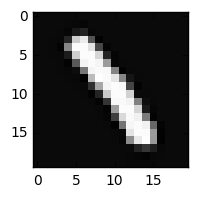

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.11883727964225602 to class: 3 
missclassifications


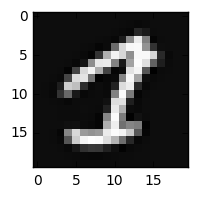

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.05276374094181097 to class: 7 
missclassifications


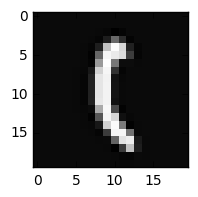

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.1882559532178498 to class: 8 
missclassifications


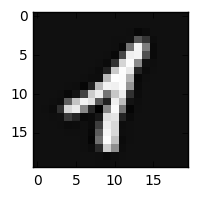

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.5769873355649661 to class: 4 
missclassifications


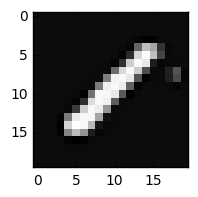

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.47084905976577945 to class: 8 
missclassifications


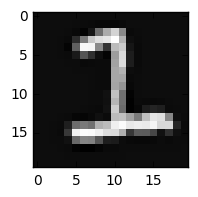

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7804322118028871 to class: 2 
missclassifications


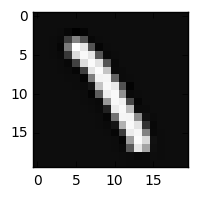

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.17650454750196112 to class: 8 
missclassifications


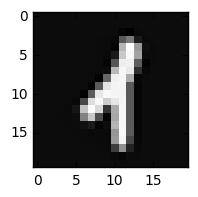

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3086531694758352 to class: 4 
missclassifications


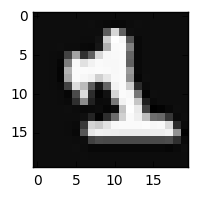

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.27070878995761444 to class: 9 
missclassifications


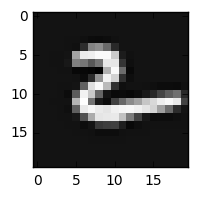

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.32265792024166373 to class: 6 
missclassifications


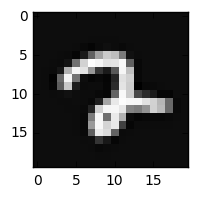

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.610219525854324 to class: 7 
missclassifications


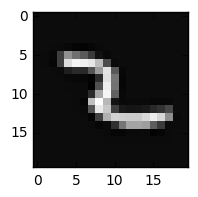

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3704293159952783 to class: 5 
missclassifications


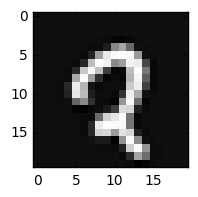

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3361492928601167 to class: 9 
missclassifications


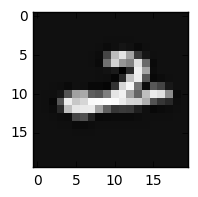

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.399581967094797 to class: 4 
missclassifications


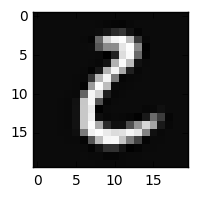

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.47156681727578603 to class: 10 
missclassifications


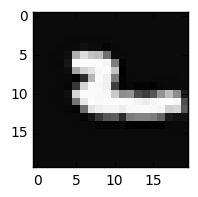

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6734648501378265 to class: 4 
missclassifications


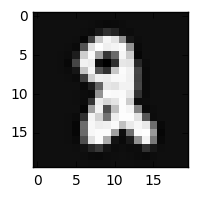

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.5719774083511144 to class: 8 
missclassifications


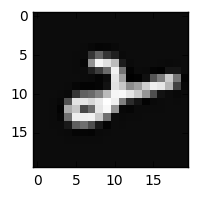

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.363438408400384 to class: 6 
missclassifications


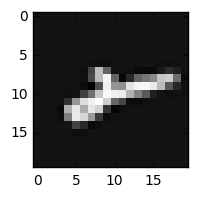

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4184796109109166 to class: 6 
missclassifications


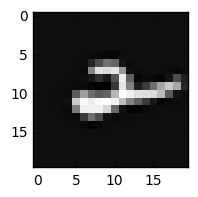

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4419603969525504 to class: 4 
missclassifications


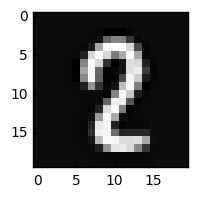

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7188579476681501 to class: 8 
missclassifications


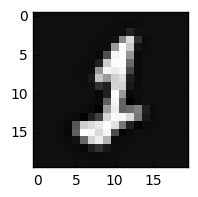

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6037669193321653 to class: 1 
missclassifications


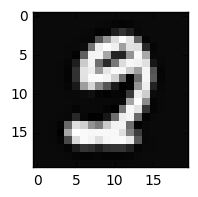

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.1556083716262954 to class: 10 
missclassifications


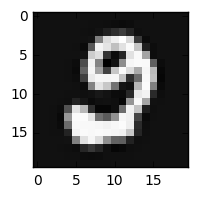

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3358025386948665 to class: 10 
missclassifications


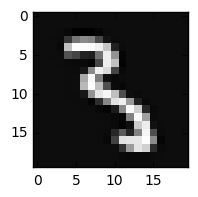

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.35967149132815784 to class: 5 
missclassifications


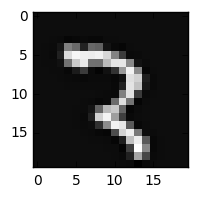

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.677122933352008 to class: 7 
missclassifications


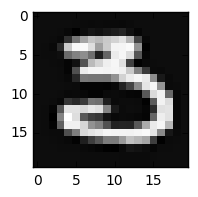

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.5560957072791247 to class: 2 
missclassifications


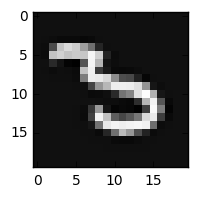

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4101897268084974 to class: 6 
missclassifications


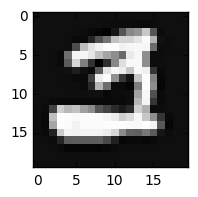

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7377637540922156 to class: 2 
missclassifications


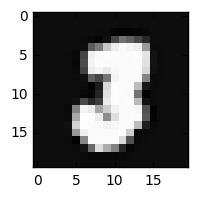

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.2971383803147695 to class: 8 
missclassifications


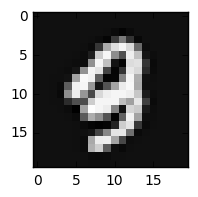

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.32932518129055716 to class: 9 
missclassifications


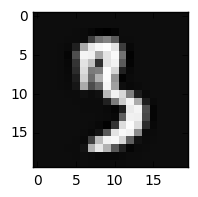

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3894469004178329 to class: 5 
missclassifications


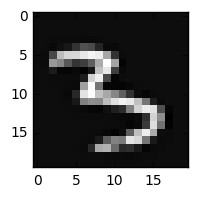

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3836254408298278 to class: 5 
missclassifications


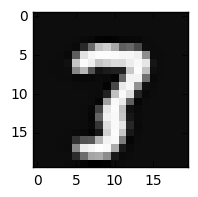

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.8958432486315462 to class: 7 
missclassifications


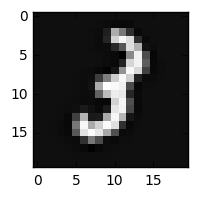

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.37708070669847554 to class: 1 
missclassifications


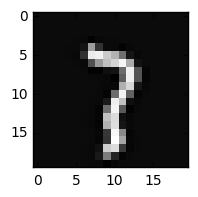

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.8526209075565285 to class: 7 
missclassifications


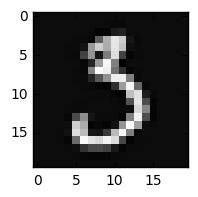

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.48498819378385316 to class: 5 
missclassifications


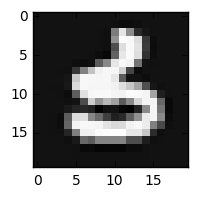

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.21256319831432324 to class: 5 
missclassifications


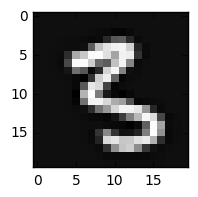

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.5056873084868202 to class: 5 
missclassifications


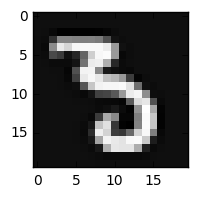

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.36669121597464527 to class: 5 
missclassifications


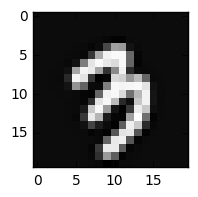

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3691560376489895 to class: 9 
missclassifications


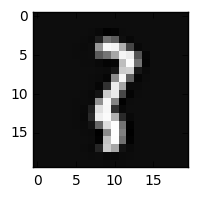

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6170949644877888 to class: 1 
missclassifications


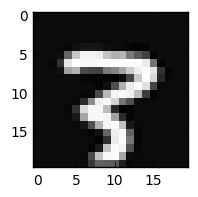

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6592953295286957 to class: 7 
missclassifications


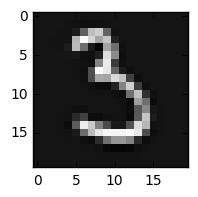

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.23279026715422668 to class: 5 
missclassifications


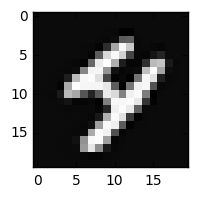

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4211737332205645 to class: 9 
missclassifications


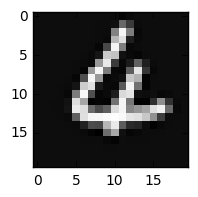

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.5996985242480625 to class: 6 
missclassifications


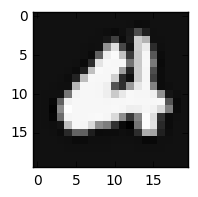

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.20786980210334274 to class: 2 
missclassifications


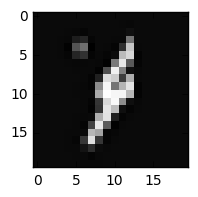

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7008204562439789 to class: 1 
missclassifications


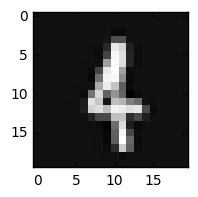

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.2029124491037063 to class: 1 
missclassifications


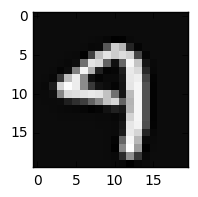

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.9667084490427156 to class: 9 
missclassifications


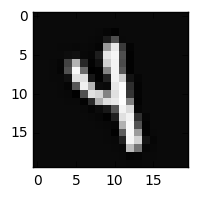

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.487307480869701 to class: 9 
missclassifications


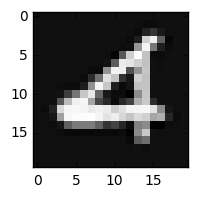

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6853311872784539 to class: 2 
missclassifications


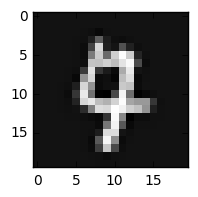

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.44800251652694967 to class: 9 
missclassifications


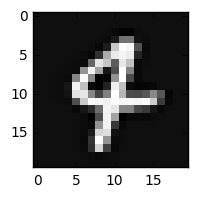

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.30612484303922505 to class: 9 
missclassifications


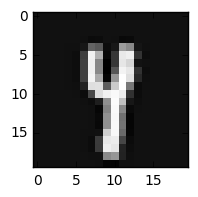

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.1511750884205746 to class: 8 
missclassifications


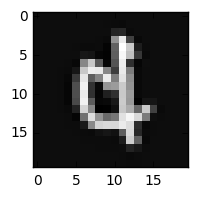

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.38340067549756096 to class: 6 
missclassifications


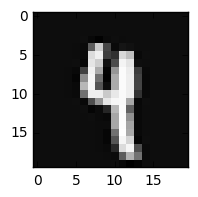

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6245376446457218 to class: 9 
missclassifications


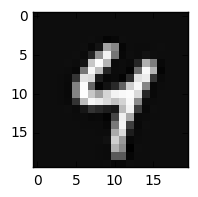

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7035459031486465 to class: 9 
missclassifications


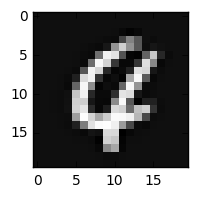

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.12840706116908537 to class: 6 
missclassifications


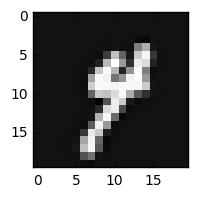

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.634082658427605 to class: 9 
missclassifications


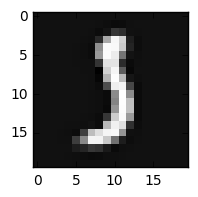

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4421987950212032 to class: 3 
missclassifications


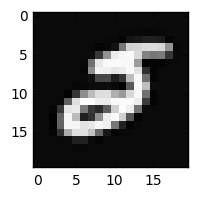

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6509546608980986 to class: 2 
missclassifications


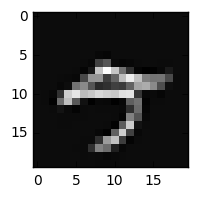

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.32856287525210937 to class: 4 
missclassifications


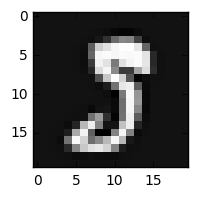

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6245203164801113 to class: 3 
missclassifications


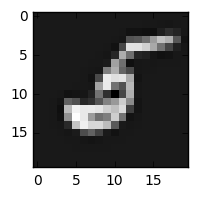

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.27741049755987673 to class: 6 
missclassifications


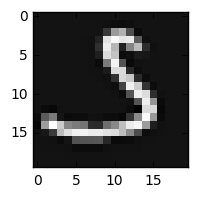

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.614451286203692 to class: 3 
missclassifications


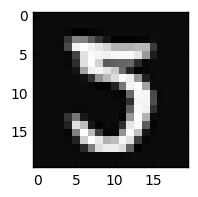

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6789060522824213 to class: 3 
missclassifications


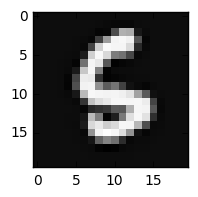

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6863370727510681 to class: 6 
missclassifications


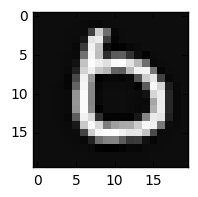

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6725968524069385 to class: 10 
missclassifications


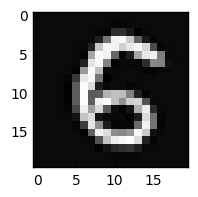

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.25109998239685605 to class: 5 
missclassifications


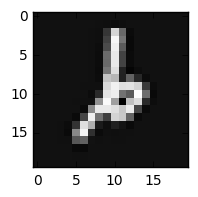

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4495634587980954 to class: 1 
missclassifications


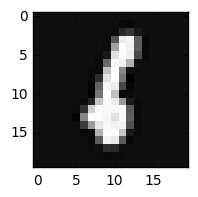

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.47066284466742175 to class: 1 
missclassifications


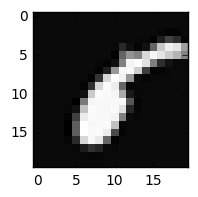

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3696391150846918 to class: 5 
missclassifications


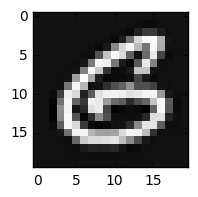

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.17979866363268182 to class: 5 
missclassifications


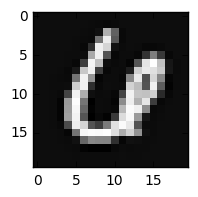

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.38780750908868605 to class: 10 
missclassifications


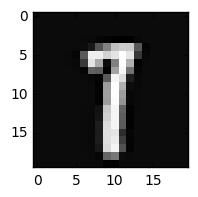

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.502366802123205 to class: 1 
missclassifications


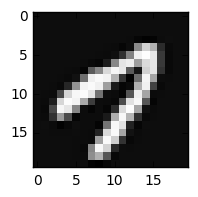

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4262063452997499 to class: 4 
missclassifications


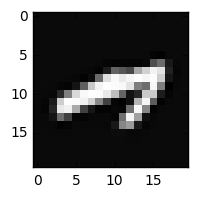

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.5051172025211237 to class: 4 
missclassifications


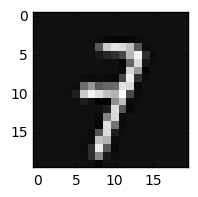

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.1614829878996263 to class: 4 
missclassifications


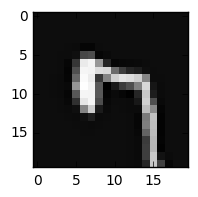

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4586726606404474 to class: 4 
missclassifications


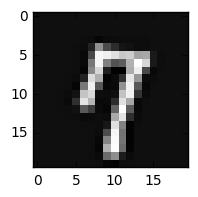

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.5738832766678893 to class: 9 
missclassifications


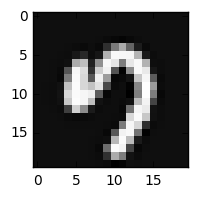

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4773370162292207 to class: 10 
missclassifications


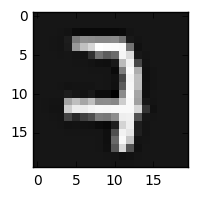

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.37493032788412695 to class: 2 
missclassifications


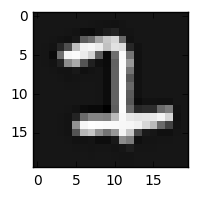

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7368055325654982 to class: 2 
missclassifications


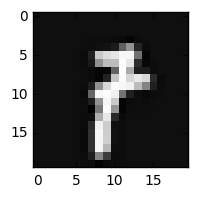

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.2103910188360318 to class: 9 
missclassifications


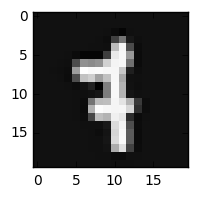

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.36766965931764845 to class: 1 
missclassifications


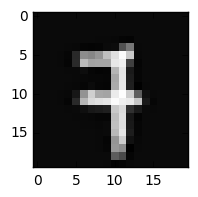

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.26970798229061094 to class: 9 
missclassifications


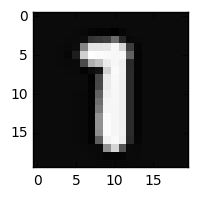

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.45072851696131144 to class: 1 
missclassifications


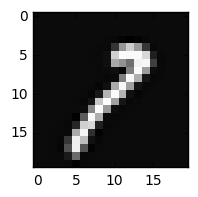

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.1175122568620622 to class: 3 
missclassifications


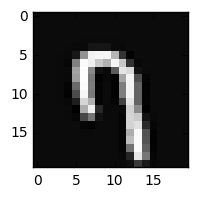

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7688297830577794 to class: 9 
missclassifications


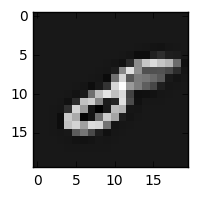

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.10126604864178891 to class: 4 
missclassifications


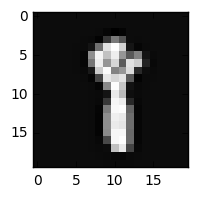

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4049552922224824 to class: 1 
missclassifications


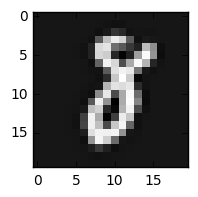

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.23805701699765514 to class: 2 
missclassifications


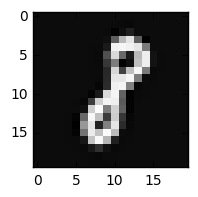

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.5547807526890299 to class: 1 
missclassifications


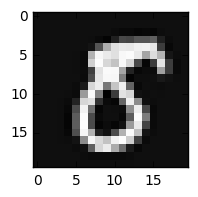

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4964510862437532 to class: 5 
missclassifications


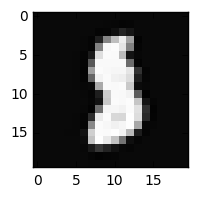

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4806598316751392 to class: 1 
missclassifications


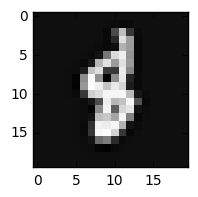

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.21985812005049646 to class: 4 
missclassifications


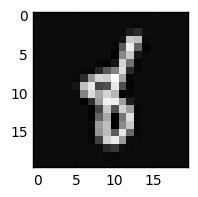

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.2852987782861863 to class: 1 
missclassifications


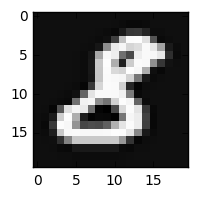

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.38803432543811994 to class: 3 
missclassifications


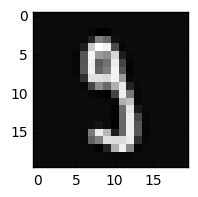

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.2547510836487299 to class: 5 
missclassifications


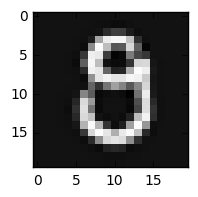

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.1817494806785034 to class: 10 
missclassifications


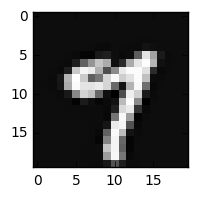

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.33399645459636473 to class: 7 
missclassifications


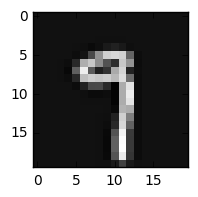

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6124094169676131 to class: 7 
missclassifications


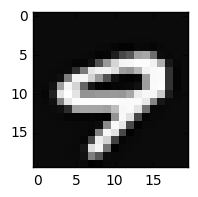

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4221995886325325 to class: 4 
missclassifications


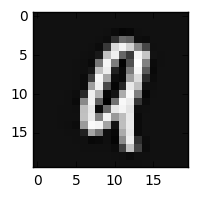

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.11508133469258101 to class: 8 
missclassifications


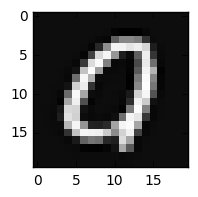

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7333877884205668 to class: 10 
missclassifications


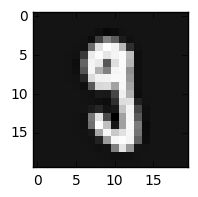

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.33129992464195557 to class: 8 
missclassifications


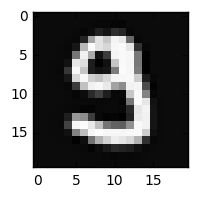

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.8607549423226623 to class: 3 
missclassifications


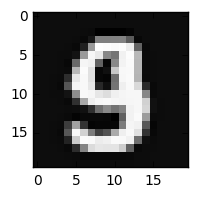

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4299810557654339 to class: 3 
missclassifications


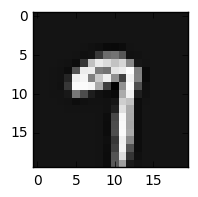

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4389064990047117 to class: 7 
missclassifications


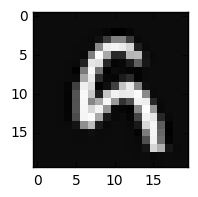

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.10426334719636192 to class: 6 
missclassifications


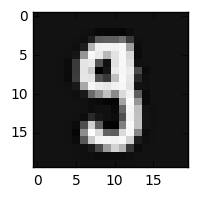

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.702655291350814 to class: 3 
missclassifications


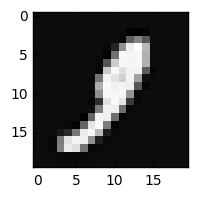

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6954400244792478 to class: 1 
missclassifications


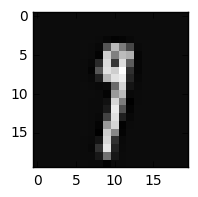

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.408011807362276 to class: 1 
missclassifications


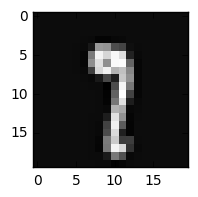

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.8663061093338064 to class: 7 
missclassifications


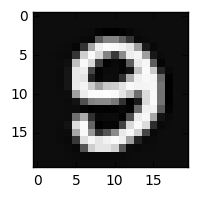

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.19012391259393047 to class: 8 
missclassifications


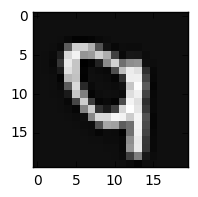

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3432347697138676 to class: 7 
missclassifications


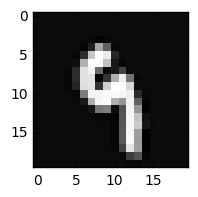

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.40866010597638597 to class: 4 
missclassifications


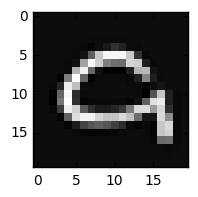

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3805346499862353 to class: 10 
missclassifications


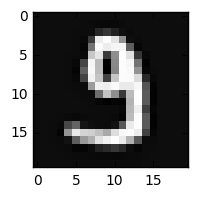

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.9250413986146521 to class: 3 


0.9752

In [114]:
training_set_accuracy(Theta1,Theta2,X,Y_matrix)

"If your implementation is correct, you should see a reported
training accuracy of about 95.3% (this may vary by about 1% due to the
random initialization)."-pdf. the result can be seen in the end of the big output screen.

missclassifications


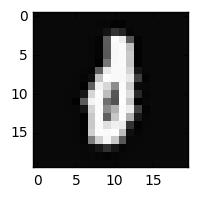

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.04582696111298501 to class: 8 
missclassifications


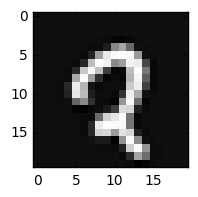

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4937123101086149 to class: 9 
missclassifications


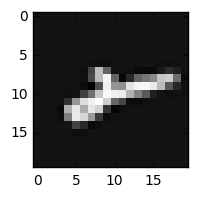

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.15136232840355418 to class: 6 
missclassifications


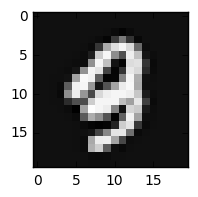

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.5849629086110218 to class: 9 
missclassifications


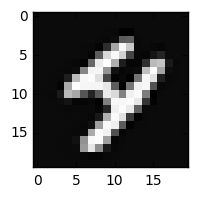

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.31627551009836674 to class: 9 
missclassifications


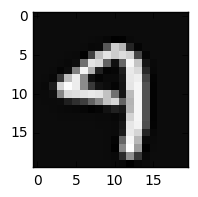

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.48567693240816723 to class: 9 
missclassifications


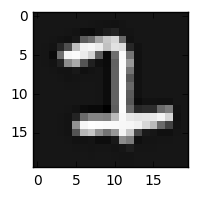

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7981216628709754 to class: 2 
missclassifications


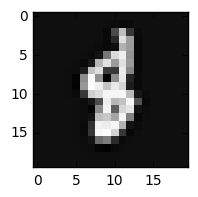

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.35474075130820076 to class: 4 
missclassifications


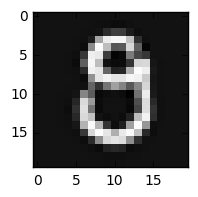

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.2527920764007828 to class: 10 
missclassifications


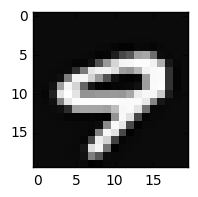

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.29235554068436337 to class: 4 
missclassifications


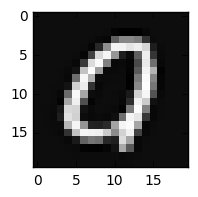

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6684054032747463 to class: 10 
missclassifications


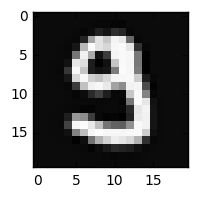

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7810345709575405 to class: 3 
missclassifications


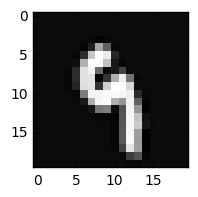

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.2521695199947401 to class: 4 
missclassifications


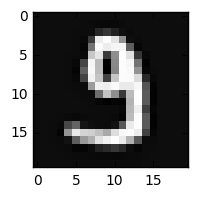

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7340152268894382 to class: 3 


0.9972

In [115]:
training_set_accuracy(Theta1_random,Theta2_random,X,Y_matrix) #try with the random initalized thetas.

Try som regularization. is likely with overfit.

In [129]:
Thetas_unrolled_reg,cost=optimal_thetas_cg(Theta1,Theta2,X,Y_matrix,l=500, iterations=2000)

         Current function value: 48.357976
         Iterations: 0
         Function evaluations: 82
         Gradient evaluations: 70


In [130]:
Theta1_reg=np.reshape(Thetas_unrolled_reg[0:25*401],(25,401))   #will be c-like, will preserve the rows of the matrix and put them next to eachother
Theta2_reg=np.reshape(Thetas_unrolled_reg[25*401:],(10,26))

missclassifications


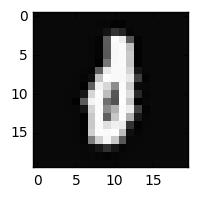

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.2387088517726361 to class: 8 
missclassifications


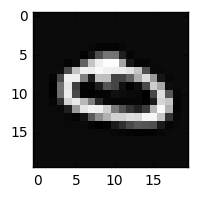

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4613279554143282 to class: 9 
missclassifications


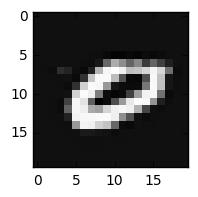

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.36358958875771547 to class: 4 
missclassifications


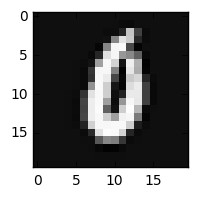

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4532530280817806 to class: 6 
missclassifications


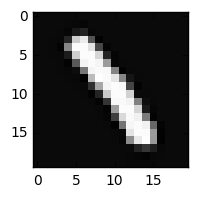

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.11883727964225602 to class: 3 
missclassifications


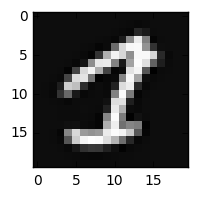

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.05276374094181095 to class: 7 
missclassifications


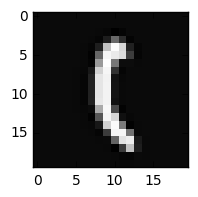

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.18825595321785007 to class: 8 
missclassifications


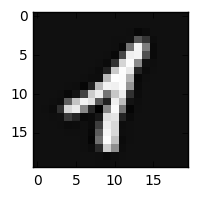

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.576987335564966 to class: 4 
missclassifications


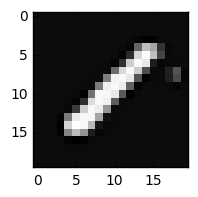

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4708490597657797 to class: 8 
missclassifications


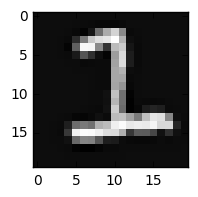

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7804322118028871 to class: 2 
missclassifications


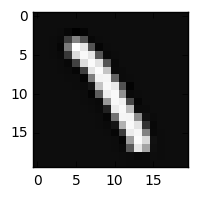

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.17650454750196096 to class: 8 
missclassifications


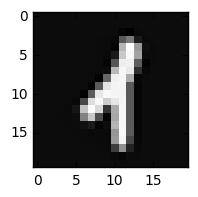

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3086531694758353 to class: 4 
missclassifications


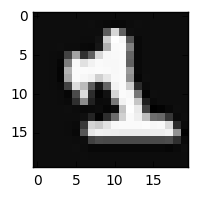

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.27070878995761477 to class: 9 
missclassifications


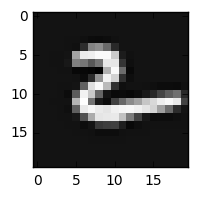

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3226579202416638 to class: 6 
missclassifications


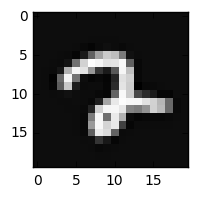

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6102195258543242 to class: 7 
missclassifications


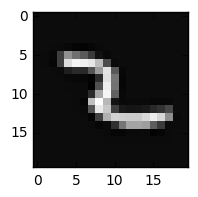

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.37042931599527873 to class: 5 
missclassifications


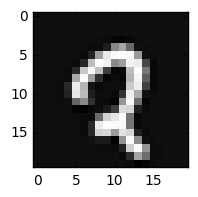

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.33614929286011697 to class: 9 
missclassifications


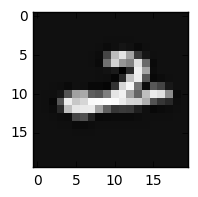

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.39958196709479715 to class: 4 
missclassifications


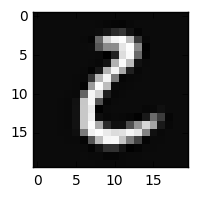

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.47156681727578603 to class: 10 
missclassifications


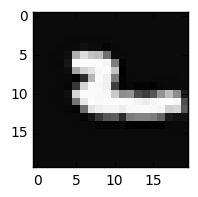

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6734648501378262 to class: 4 
missclassifications


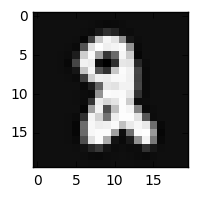

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.5719774083511149 to class: 8 
missclassifications


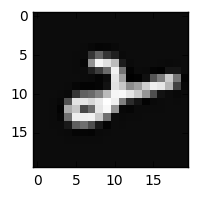

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.36343840840038394 to class: 6 
missclassifications


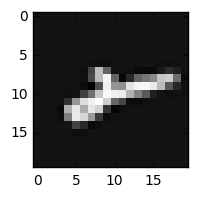

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.41847961091091684 to class: 6 
missclassifications


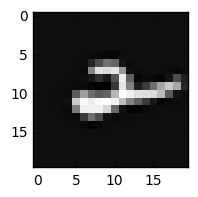

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.44196039695255074 to class: 4 
missclassifications


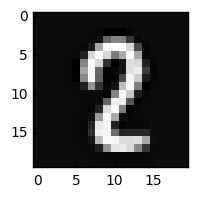

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7188579476681498 to class: 8 
missclassifications


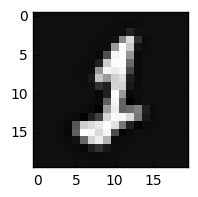

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6037669193321652 to class: 1 
missclassifications


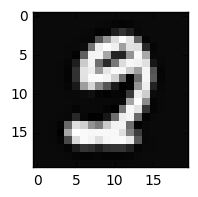

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.15560837162629534 to class: 10 
missclassifications


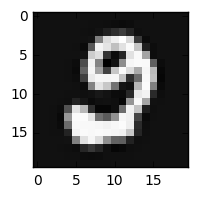

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3358025386948668 to class: 10 
missclassifications


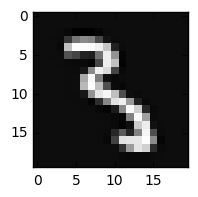

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3596714913281578 to class: 5 
missclassifications


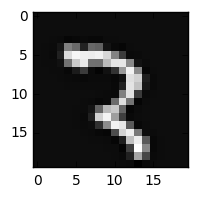

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6771229333520081 to class: 7 
missclassifications


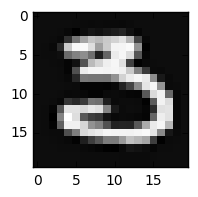

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.5560957072791247 to class: 2 
missclassifications


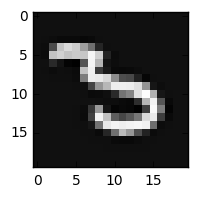

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.41018972680849725 to class: 6 
missclassifications


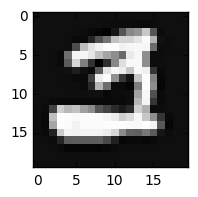

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7377637540922155 to class: 2 
missclassifications


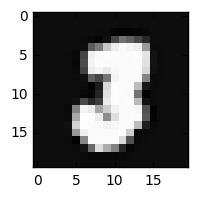

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.2971383803147697 to class: 8 
missclassifications


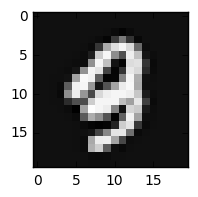

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.329325181290557 to class: 9 
missclassifications


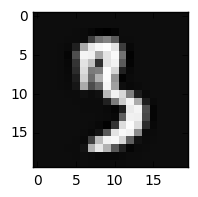

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3894469004178331 to class: 5 
missclassifications


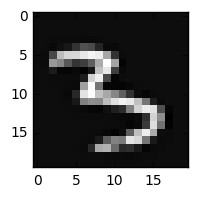

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.38362544082982775 to class: 5 
missclassifications


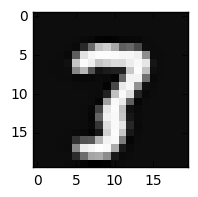

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.8958432486315462 to class: 7 
missclassifications


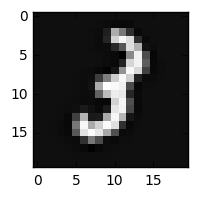

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.37708070669847527 to class: 1 
missclassifications


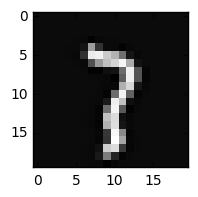

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.8526209075565288 to class: 7 
missclassifications


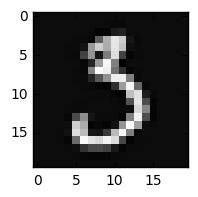

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.484988193783854 to class: 5 
missclassifications


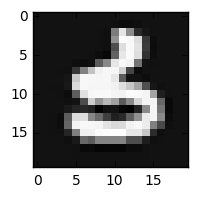

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.21256319831432305 to class: 5 
missclassifications


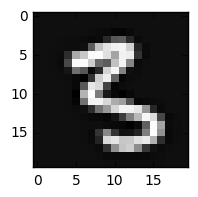

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.5056873084868204 to class: 5 
missclassifications


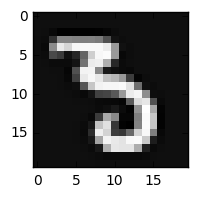

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.36669121597464516 to class: 5 
missclassifications


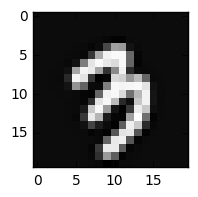

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.36915603764898963 to class: 9 
missclassifications


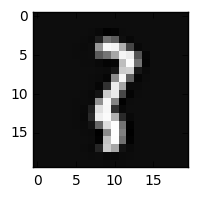

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6170949644877888 to class: 1 
missclassifications


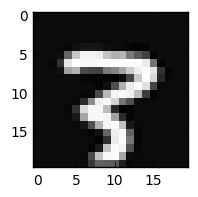

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6592953295286957 to class: 7 
missclassifications


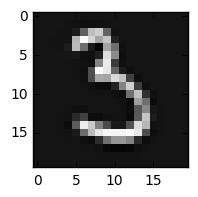

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.23279026715422702 to class: 5 
missclassifications


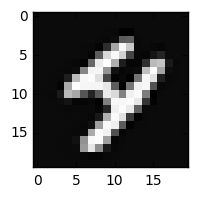

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.42117373322056445 to class: 9 
missclassifications


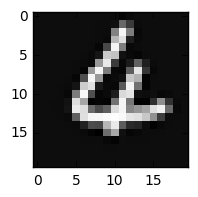

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.5996985242480624 to class: 6 
missclassifications


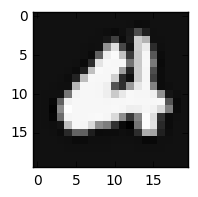

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.2078698021033424 to class: 2 
missclassifications


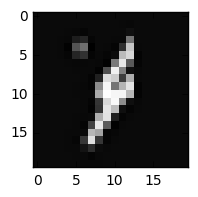

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7008204562439793 to class: 1 
missclassifications


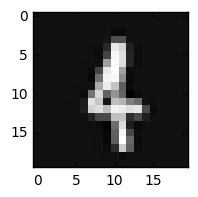

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.2029124491037063 to class: 1 
missclassifications


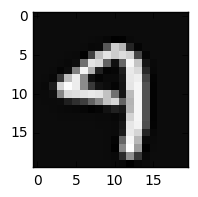

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.9667084490427156 to class: 9 
missclassifications


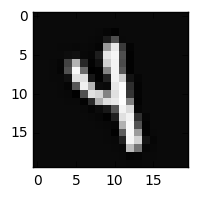

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.48730748086970144 to class: 9 
missclassifications


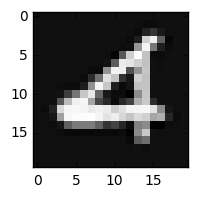

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6853311872784539 to class: 2 
missclassifications


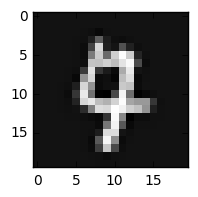

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.44800251652694956 to class: 9 
missclassifications


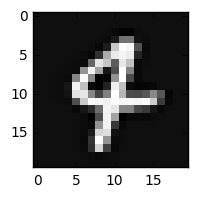

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.30612484303922494 to class: 9 
missclassifications


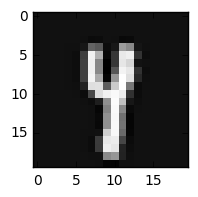

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.15117508842057462 to class: 8 
missclassifications


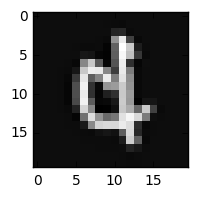

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.38340067549756074 to class: 6 
missclassifications


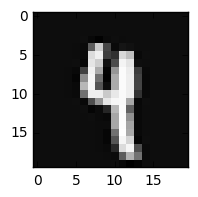

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6245376446457218 to class: 9 
missclassifications


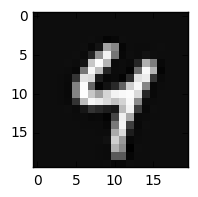

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7035459031486464 to class: 9 
missclassifications


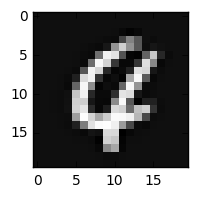

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.12840706116908543 to class: 6 
missclassifications


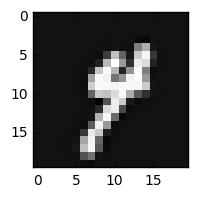

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6340826584276054 to class: 9 
missclassifications


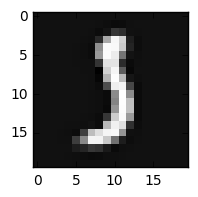

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4421987950212032 to class: 3 
missclassifications


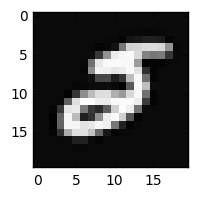

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6509546608980986 to class: 2 
missclassifications


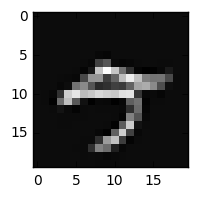

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3285628752521093 to class: 4 
missclassifications


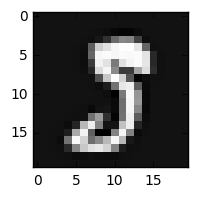

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6245203164801111 to class: 3 
missclassifications


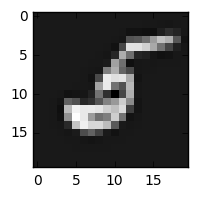

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.27741049755987673 to class: 6 
missclassifications


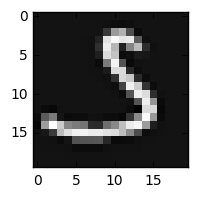

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6144512862036918 to class: 3 
missclassifications


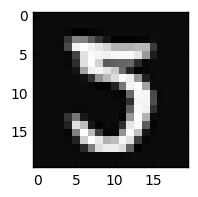

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6789060522824214 to class: 3 
missclassifications


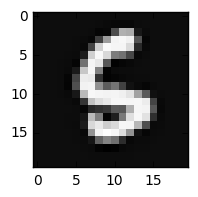

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6863370727510684 to class: 6 
missclassifications


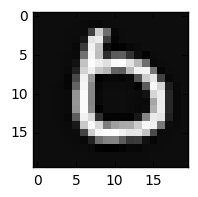

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6725968524069382 to class: 10 
missclassifications


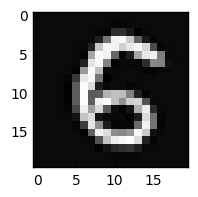

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.2510999823968559 to class: 5 
missclassifications


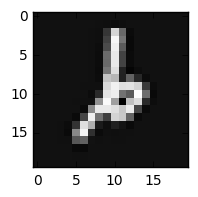

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.44956345879809545 to class: 1 
missclassifications


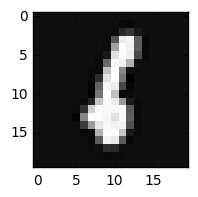

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4706628446674222 to class: 1 
missclassifications


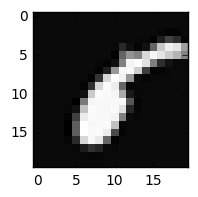

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3696391150846922 to class: 5 
missclassifications


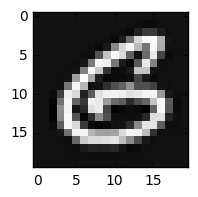

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.17979866363268182 to class: 5 
missclassifications


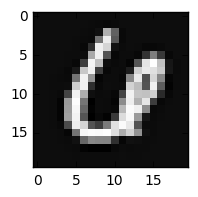

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.38780750908868616 to class: 10 
missclassifications


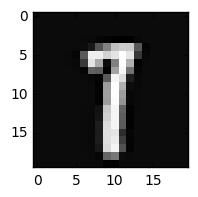

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.5023668021232051 to class: 1 
missclassifications


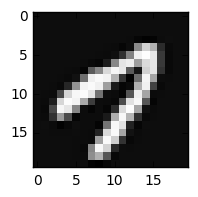

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.42620634529975016 to class: 4 
missclassifications


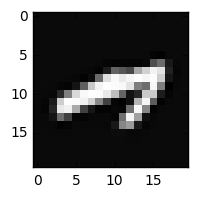

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.5051172025211237 to class: 4 
missclassifications


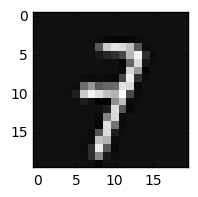

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.16148298789962626 to class: 4 
missclassifications


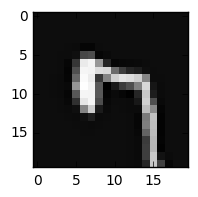

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.45867266064044726 to class: 4 
missclassifications


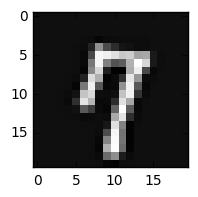

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.5738832766678891 to class: 9 
missclassifications


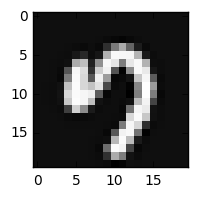

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4773370162292206 to class: 10 
missclassifications


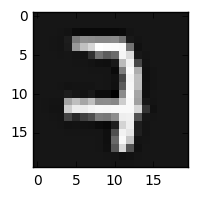

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3749303278841269 to class: 2 
missclassifications


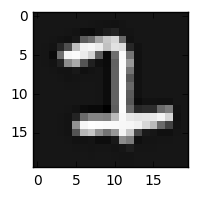

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7368055325654981 to class: 2 
missclassifications


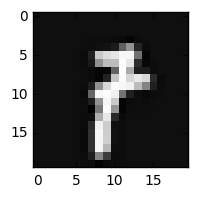

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.2103910188360319 to class: 9 
missclassifications


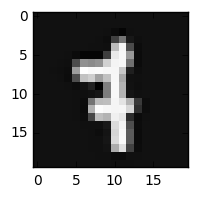

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3676696593176486 to class: 1 
missclassifications


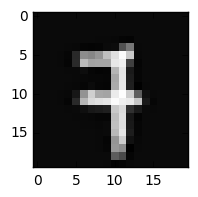

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.26970798229061077 to class: 9 
missclassifications


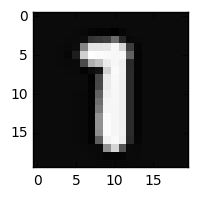

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.45072851696131155 to class: 1 
missclassifications


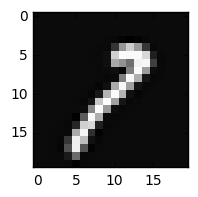

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.11751225686206225 to class: 3 
missclassifications


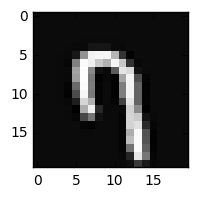

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7688297830577795 to class: 9 
missclassifications


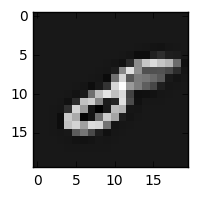

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.10126604864178897 to class: 4 
missclassifications


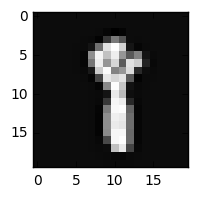

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.40495529222248255 to class: 1 
missclassifications


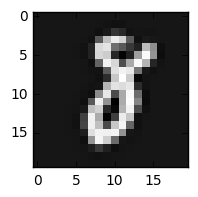

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.23805701699765533 to class: 2 
missclassifications


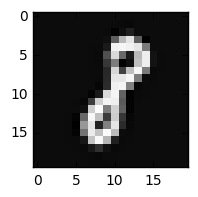

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.55478075268903 to class: 1 
missclassifications


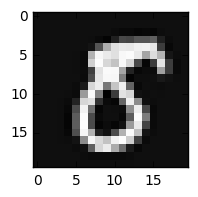

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.49645108624375256 to class: 5 
missclassifications


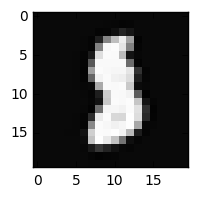

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.48065983167513915 to class: 1 
missclassifications


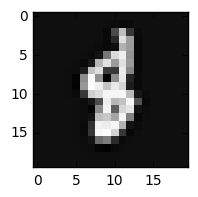

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.21985812005049662 to class: 4 
missclassifications


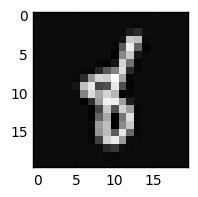

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.2852987782861865 to class: 1 
missclassifications


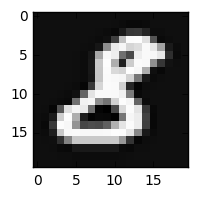

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.38803432543811983 to class: 3 
missclassifications


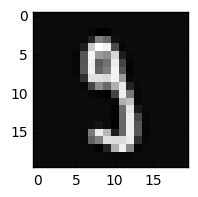

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.2547510836487298 to class: 5 
missclassifications


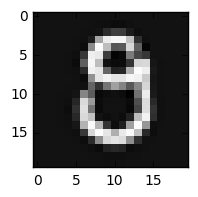

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.18174948067850363 to class: 10 
missclassifications


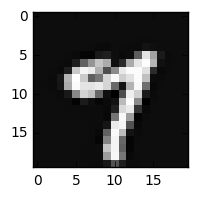

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3339964545963648 to class: 7 
missclassifications


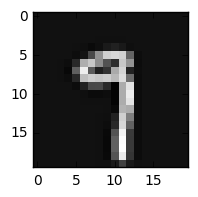

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.6124094169676131 to class: 7 
missclassifications


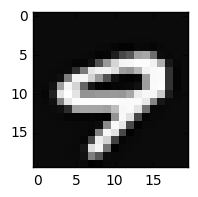

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.42219958863253265 to class: 4 
missclassifications


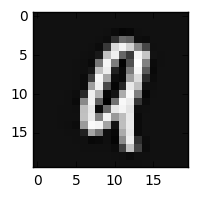

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.11508133469258111 to class: 8 
missclassifications


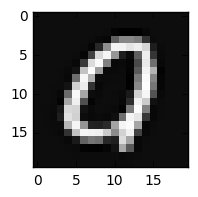

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7333877884205666 to class: 10 
missclassifications


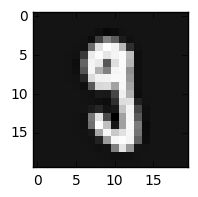

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3312999246419552 to class: 8 
missclassifications


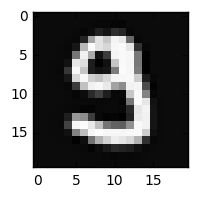

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.8607549423226623 to class: 3 
missclassifications


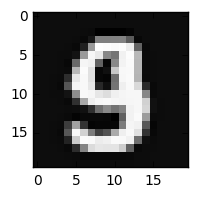

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4299810557654332 to class: 3 
missclassifications


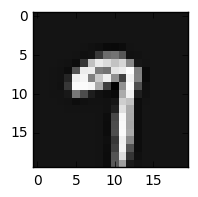

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4389064990047113 to class: 7 
missclassifications


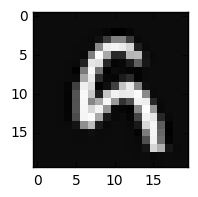

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.10426334719636192 to class: 6 
missclassifications


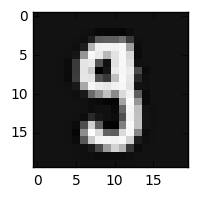

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.7026552913508141 to class: 3 
missclassifications


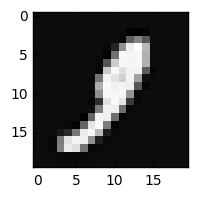

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.695440024479248 to class: 1 
missclassifications


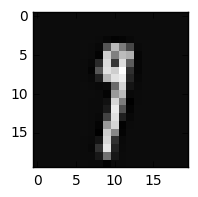

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.4080118073622759 to class: 1 
missclassifications


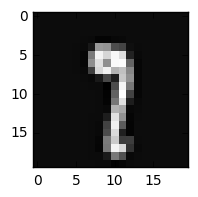

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.8663061093338063 to class: 7 
missclassifications


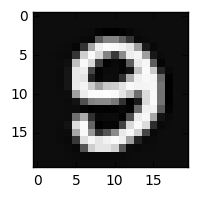

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.19012391259393072 to class: 8 
missclassifications


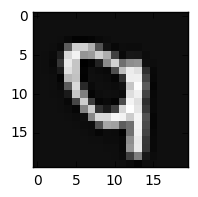

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.3432347697138672 to class: 7 
missclassifications


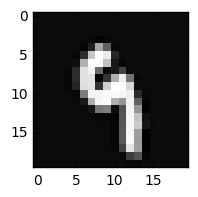

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.40866010597638625 to class: 4 
missclassifications


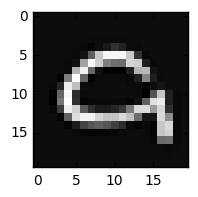

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.38053464998623543 to class: 10 
missclassifications


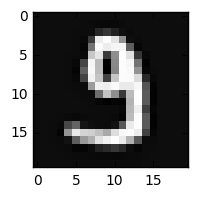

above is the image-representation of the input and below the prediction
the algorithm (neural network) assigns max value: 0.9250413986146521 to class: 3 


0.9752

In [131]:
training_set_accuracy(Theta1_reg,Theta2_reg,X,Y_matrix)

In [ ]:
hmmm....it changes the cost but the prediction accuracy seem to be the same...
TODO:figure out why.